 # ECS7024 Statistics for Artificial Intelligence and Data Science 
 # Report submitted by: 220756349 Anushree Vishnoi
 
 ## Coursework 2: Aims and Outline
 
The aim of this coursework is to submit a report to the Texas Department of Transportation explaining/predicting the current condition(target variable - Deck_rating, Superstr_rating and Substr_rating)of the Texas bridges on the basis of 5 proposed predictors(dependent variables - Age, Average use, percent trucks, material and design). 

We shall help the Texas department investigate/understand how well the proposed variables can predict the bridge condition and which of the proposed variables has more influence on the current condition.

**The use of regression model has been agreed in advance**

 1. Section 1: Introducing the data set and data preparation 
     1. The source of the data and variables
     1. Loading the dataset
     1. Selecting the dataframe - predictor and condition variables
     1. Deriving predictor variable - 'Age' from year variable
     1. Renaming predictor variables as required
     1. Removing null values and performing a data check/exploration 
     1. Histogram data distribution check - continuous variables
     1. Removing outliers (very old bridges - prehistoric ones)- box plot
     1. Simplifying categorical variables - material and design 
     1. Converting the 3 main conditions(rating_type/ordinal categories) to continuous variables
     1. Deriving the current condition(target variable)- summing of the 3 main condition variables  
   
 2. Section 2: Exploratory Analysis
     1. Correlation Matrix and heat map - continuous variables
     1. Scatter Matrix plot and X-Y scatter plot - continuous variables
     1. Comparing Groups using Kernel Density 
     1. Cross Tabulation and Normalisation - Categorical variables
     1. Plotting Conditional Probability Distributions - Categorical variables
     1. Heat map of (Conditional) Probabilities - Categorical variables
    
 3. Section 3: Regression Modelling
     1. Regression with continuous predictors
     1. Using categorical predictors
     1. R2 (coefficient of determination)
     1. Distribution of residuals(error)
     1. Comparison of coefficients
     1. Conclusion



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

## Section 1: Introducing the Data Set and Data Preparation

#### Section 1.1 Source of the data

This notebook looks at some data from the US National Bridge Inspection maintained by the Federal Highways Agency (FHWA), 
part of the US Department of Transportation. The original data comes from the [National Bridge Inspection](https://www.fhwa.dot.gov/bridge/nbi/ascii.cfm) section of the FHWA's web site. However, it has been greatly simplified.

**The aim of the Bridge Inspection programme is to check on the state of bridges so that necessary repairs can be carried out . If this is not done, a bridge can fail. The dataset has information about the bridges and the condition given in the most recent inspection.**

* The FHWA's database covers the whole USA. Our data is only for the state of Texas. 
* As well as bridges, the FHWA's database covers tunnels (there seem to be no highway tunnels in Texas) and 'culverts'. A culvert is a form of drain, allowing water to pass under a highway. The culverts have been removed, leaving only the bridges.
* All of the bridges carry a highway (that is, a road runs over the bridge). What is underneath varies: another road, a waterway or a railway are among the possibilities. 


#### Section 1.1 The Variables
The original FHWA dataset has over 100 variables (Texas collects even more); ours is simplified. Both continuous and categorical variables are included. 


| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Structure_id   | Unique identifier of the bridge                  | String |
|District       | Highway district in Texas responsible for bridge | category | 
|Detour_Km      | Length of detour if bridge closed                | continuous |
|Toll           | Whether a toll is paid to use bridge             | category |
|Maintainer     | The authority responsible for maintenance        | category |
|Urban          | Whether the bridge is located in an urban or rural area   | category |
|Status         | The road class: interstate to local                       | category | 
|Year           | The year the bridge was built                             | continuous | 
|Lanes_on       | The number of lanes that run over the bridge              | continuous (or discrete) |
|Lanes_under    | The number of lanes that run under the bridge             | continuous (or discrete) |
|AverageDaily   | The average daily traffic (number of vehicles)            | continuous |
|Future_traffic | The estimated daily traffic in approx 20 years time       | continuous |
|Trucks_percent | The percent of traffic made up of 'trucks' (i.e. lorries) | continuous |
|Historic       | Whether the bridge is historic                            | category | 
|Service_under  | The (most important) service that runs under the bridge   | category |
|Material       | The dominant material the bridge is made from             | category |
|Design         | The design of the bridge                                  | category |
|Spans          | The number of spans the bridge has                        | category (or discrete) |
|Length         | The length of the bridge in metres                        | continuous |
|Width          | The width of the bridge in metres                         | continuous |
|Rated_load     | The rated max loading of bridge (in tonnes)               | continuous |
|Scour_rating   | Only for bridges over water: the 'scour' condition        | ordinal |
|Deck_rating    | The condition of the deck of the bridge                   | ordinal |
|Superstr_rating| The condition of the bridge superstructure                | ordinal |
|Substr_rating  | The condition of the bridge substructure (foundations)    | ordinal |

**Note on 'scour'**: when a bridge is over (for example) a river, the flow of water in the river can undermine any 
bridge supports (called 'piers') in the water. This is called 'scouring' . The `Scour_rating` gives the condition 
with respect to possible damage from scouring. 
 
**Values of Categorical Variables** In the original data, the values of the categorical variables are represented as integers, with their meanings given in a data dictionary. In our dataset, these 'numeric codes' have been replaced with suitable names.

| Variable      |      Values            |
|:--------------|:-----------------------|
|District       | Each district has a unique number  |
|Toll           | Toll, Free                |
|Maintainer     | State, County, Town or City, Agency, Private, Railroad, Toll Authority, Military, Unknown |
|Urban          | Urban, Rural |
|Status         | Interstate, Arterial, Minor, Local |
|Historic       | Register, Possible, Unknown, Not historic |
|Service_under  | Other, Highway, Railroad, Pedestrian, Interchange, Building |
|Material       | Other, Concrete, Steel, Timber, Masonry |
|Design         | Other, Slab, Beam, Frame, Truss, Arch, Suspension, Movable, Tunnel, Culvert, Mixed |
|Scour_rating   | Unknown, Critical, Unstable, Stable, Protected, Dry, No waterway |
|Deck_rating    | *Rating*: NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed |
|Superstr_rating| *Rating* |
|Substr_rating  | *Rating* |
    

#### 1.2 Loading the Dataset

Loading the data from CSV file. A 'type map' is used to set the types of each variables. 
Categorical Variables: using type category gives the default behaviour (each unique value as a category and categories are not ordered). However, for the ordinal variables (categorical variables with an order) we have declared a suitable type explicitly.

In [2]:
# Catageorical type with categories in a specified order
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent', 'NA'], 
    ordered=True)

# This one is also for an ordinal variable, but with a slightly different set of values
scour_type = pd.CategoricalDtype(
    categories=['Unknown', 'Critical','Unstable', 'Stable', 'Protected', 'Dry', 'No waterway'], 
    ordered=True)

types_dict = { 'Structure_id': str, 'District':'category', 'Toll':'category', 
              'Maintainer':'category', 'Urban':'category', 'Status':'category', 
              'Historic':'category', 'Service_under':'category', 'Material':'category', 
              'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type, 
              'Scour_rating':scour_type}

bridges = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict, index_col ='Structure_id')
bridges  

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


#### 1.3 The Dataframe

Selecting the predictor variables and target variables namely - Age (derived from variable Year), average use (variable AverageDaily),percent trucks (variable Trucks_percent), material (variable Material) and design (variable Design).Target variables (current condition) being derived from variables Deck_rating, Superstr_rating and Substr_rating of the bridges.


In [3]:
df= bridges.loc[ :,['Year','AverageDaily','Trucks_percent','Material','Design','Deck_rating',
                    'Superstr_rating','Substr_rating']]
df

,Year,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,
000021521-00101,2005,1,0.0,Concrete,Slab,Good,Very Good,Very Good
000021521-00181,2005,1,0.0,Concrete,Slab,Good,Good,Very Good
000021521-TMP20,2012,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
000021525-00012,1950,80,0.0,Timber,Beam,Good,Good,Poor
000021580-00092,2004,150,4.0,Concrete,Beam,Good,Very Good,Very Good
...,...,...,...,...,...,...,...,...
DAPFORHOO000012,1994,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000013,2000,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000015,1996,1200,25.0,Concrete,Beam,Good,Good,Good


#### 1.4 Deriving Variable Age in years

since we don't have the age variable in the available dataframe, we can derive one from the given 'Year variable' by subtracting the current year 2022 and the year of construction of the respective bridges to get the age in years

In [4]:
df['Year'] = 2022 - df['Year'] #renaming the 'Year' variable to 'age' in the next step
df

,Year,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,
000021521-00101,17,1,0.0,Concrete,Slab,Good,Very Good,Very Good
000021521-00181,17,1,0.0,Concrete,Slab,Good,Good,Very Good
000021521-TMP20,10,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
000021525-00012,72,80,0.0,Timber,Beam,Good,Good,Poor
000021580-00092,18,150,4.0,Concrete,Beam,Good,Very Good,Very Good
...,...,...,...,...,...,...,...,...
DAPFORHOO000012,28,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000013,22,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000015,26,1200,25.0,Concrete,Beam,Good,Good,Good


#### 1.5 Renaming Variables

Here we are renaming the predictor variables labels as required by the management of the Texas Department of Transportation to perform the investigation on the current condition of the bridges using the regression model(as agreed in advance)

In [5]:
df.rename(columns={"Year":"Age", "AverageDaily":"Average_use","Trucks_percent":"Percent_trucks"}, inplace=True)   
df

,Age,Average_use,Percent_trucks,Material,Design,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,
000021521-00101,17,1,0.0,Concrete,Slab,Good,Very Good,Very Good
000021521-00181,17,1,0.0,Concrete,Slab,Good,Good,Very Good
000021521-TMP20,10,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
000021525-00012,72,80,0.0,Timber,Beam,Good,Good,Poor
000021580-00092,18,150,4.0,Concrete,Beam,Good,Very Good,Very Good
...,...,...,...,...,...,...,...,...
DAPFORHOO000012,28,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000013,22,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000015,26,1200,25.0,Concrete,Beam,Good,Good,Good


#### 1.6 Removing null values - Data preprocessing

Data pre-processing is a very important step for data preparation as that might affect our analysis. 
We shall remove any anomalies like null values from the raw data to submit correct report to the management by using dropna() method

In [6]:
df = df.dropna()
df

,Age,Average_use,Percent_trucks,Material,Design,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,
000021521-00101,17,1,0.0,Concrete,Slab,Good,Very Good,Very Good
000021521-00181,17,1,0.0,Concrete,Slab,Good,Good,Very Good
000021521-TMP20,10,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
000021525-00012,72,80,0.0,Timber,Beam,Good,Good,Poor
000021580-00092,18,150,4.0,Concrete,Beam,Good,Very Good,Very Good
...,...,...,...,...,...,...,...,...
DAPFORHOO000012,28,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000013,22,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000015,26,1200,25.0,Concrete,Beam,Good,Good,Good


Data examination to avoid any errors - checking the variable categories, data types and null values present in our dataframe.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34286 entries, 000021521-00101 to DAPTRABLI000011
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              34286 non-null  int64   
 1   Average_use      34286 non-null  int64   
 2   Percent_trucks   34286 non-null  float64 
 3   Material         34286 non-null  category
 4   Design           34286 non-null  category
 5   Deck_rating      34286 non-null  category
 6   Superstr_rating  34286 non-null  category
 7   Substr_rating    34286 non-null  category
dtypes: category(5), float64(1), int64(2)
memory usage: 1.2+ MB


In [8]:
df.describe()

,Age,Average_use,Percent_trucks
count,34286.000000,34286.000000,34286.000000
mean,40.502917,11630.138453,8.577787
std,23.860336,24232.756674,10.347690
min,3.000000,0.000000,0.000000
25%,20.000000,330.000000,0.000000
50%,37.000000,3290.000000,5.000000
75%,58.000000,11870.000000,13.000000
max,122.000000,543000.000000,99.000000


**Describing the data to understand the distribution metrics of the predictor variables:**

1. By looking at the table we can gauge that the probability distribution for the predictor variables is non-symmetric and are skewed since the two halves are not equal, one half is bigger than the other*

2. For Age variable, max value is 122, min value is 3 and median value is 37, median being the mid value, we get the two halves as 37 -3 = 33 and 122-37 = 85 which highlights the fact that there is a skew towards the right because 85 (right half) is much larger than 33 (left half).

3. So, let's verify the same by plotting the distribution graphs - histogram and box plots to check for outliers.

#### 1.7 Plotting predictor variables - Histograms (Probability distribution check)

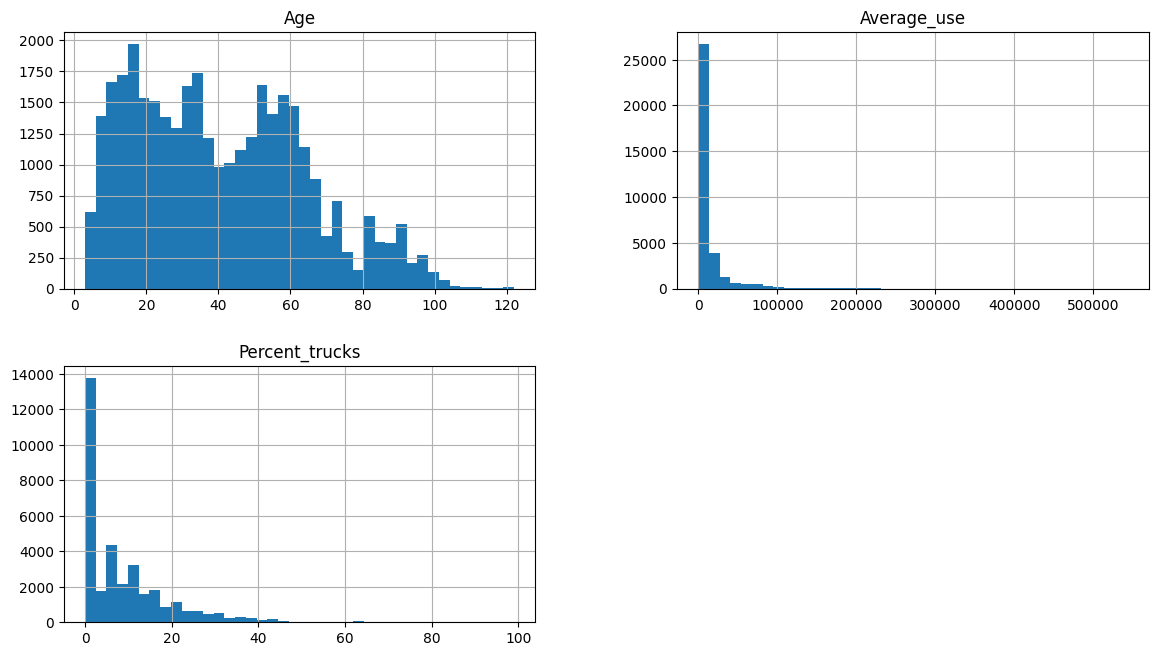

In [9]:
# Distributions of numerical variables 
_hist = df.hist(bins=40, figsize=(14,25), layout=(6,2)) 

**Inferences:**

1. We see from the distribution curves that the distribution is not normal and is skewed showcasing the presence of outliers -
values that are extremely high or low.

2. For age variable, we shall exclude the extremely high values which are very high basically the the very old bridges.

3. Average use or the average daily traffic of the number of vehicles and percent trucks variables which is the percent of 
traffic made of trucks (lorries) would not impact the bridge condition.

4. It implies that more traffic on the bridge or more
number of trucks( percentage) would in no way deteriorate the condition of the bridge and will remain a neutral variable in 
deciding the bridge condition.Hence we shall only remove the age outliers.

#### 1.8 Removing outliers

1. Box plot summarises a distribution splitting the area into 4 equal quartiles each being 25%
2. q1_age is first quartile  and q3_age is the third quartile a
3. Inter quartle range is the third quartile minus first quartile
4. We calculate the upper limit and the lower limit and any bridge that falls outside this limit will be removed consideting it an outliers (we can see from plot that bridge outlier upper limit will be around 115 which seems to be right considering the data as well.)
5. Assumption is that the bridges older than 115 years can be considered as pre historic and excluded from the dataset


<AxesSubplot: >

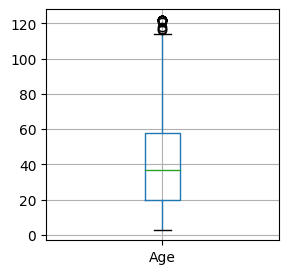

In [10]:
# To see the outliers clearly
df[['Age']].boxplot(figsize=(3,3))

Applying Inter quartile Range method to remove outliers

In [11]:
q1_age = df['Age'].quantile(0.25)
q3_age = df['Age'].quantile(0.75)
iqr_age = q3_age - q1_age
q1_age,q3_age,iqr_age

(20.0, 58.0, 38.0)

In [12]:
upper_limit_age = q3_age + (1.5 * iqr_age)
lower_limit_age = q1_age - (1.5 * iqr_age)
upper_limit_age,lower_limit_age


(115.0, -37.0)

Finding the outliers

In [13]:
df.loc[(df['Age'] > upper_limit_age) | (df['Age'] < lower_limit_age)]

,Age,Average_use,Percent_trucks,Material,Design,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,
020730AA0270001,116,490,0.0,Steel,Truss,Good,Satisfactory,Good
082090AA0188001,122,1,0.0,Steel,Truss,Failed,Failed,Failed
090500AA0274001,122,54,0.0,Steel,Beam,Good,Satisfactory,Fair
090500C00175001,118,614,0.0,Steel,Truss,Satisfactory,Poor,Satisfactory
090740AA0236001,122,55,0.0,Steel,Truss,Failing,Failing,Failing
090980AA0238002,122,35,0.0,Steel,Beam,Good,Satisfactory,Fair
090980AA0266001,122,11,0.0,Steel,Truss,Fair,Poor,Satisfactory
091610B00331001,121,3800,0.0,Steel,Truss,Very Good,Fair,Satisfactory
130760AA0189001,122,150,0.0,Steel,Truss,Good,Satisfactory,Satisfactory


In [14]:
df_new = df.loc[(df['Age'] < upper_limit_age) & (df['Age'] > lower_limit_age)]
print ('Before removing outliers:', len(df['Age']))
print ('After removing outliers:', len(df_new['Age']))
print('Outliers:', len(df['Age']) - len(df_new['Age']))

Before removing outliers: 34286
After removing outliers: 34270
Outliers: 16


<AxesSubplot: >

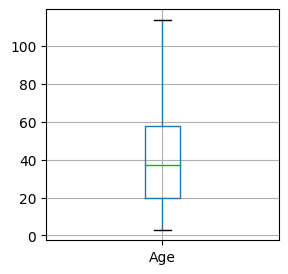

In [15]:
df_new[['Age']].boxplot(figsize=(3,3))

#### 1.9 Simplifying categories

Simplifying categorical variable - material by reducing the number of categories. Value_counts function gives us a count of
the number of categories under each material category.

In [16]:
df_new['Material'].value_counts()

Concrete    27121
Steel        6623
Timber        465
Other          48
Masonry        13
Name: Material, dtype: int64

*since 'Masonry' has a very small value as compared to the rest of the categories, merging it with the category label "Other" to reduce the number of categories using replace() method*

In [17]:
df_new.loc[:,['Material']].replace ({'Masonry':'Other'},inplace=True)
df_new['Material'].value_counts()

Concrete    27121
Steel        6623
Timber        465
Other          61
Name: Material, dtype: int64

*Simplifying the design category using the same approach as material but the number of categories under the design variable are more and they have smaller percentage values as compared to the top three i.e Beam, Slab and Other hence merging the rest with "Other"*

In [18]:
df_new.loc[:,['Design']].value_counts()

Design    
Beam          28322
Slab           4339
Other          1240
Arch            158
Truss           125
Frame            68
Movable          13
Suspension        5
dtype: int64

In [19]:
df_new.loc[:,['Design']].replace({'Suspension':'Other','Movable':'Other','Frame':'Other','Truss':'Other','Arch':'Other'},
                                 inplace=True)
df_new.loc[:,['Design']].value_counts()

Design
Beam      28322
Slab       4339
Other      1609
dtype: int64

#### 1.10 Categorical to continuous variable

Converting the ordinal variables namely - Deck_rating,Superstr_rating and Substr_rating to continuous by replacing each rating by an integer score (replacing integer 0 for failed)

In [20]:
df_new = df_new.reset_index()

df_new['Deck_rating'].replace(['Failed','Failing','Critical','Serious','Poor','Fair','Satisfactory','Good',
                            'Very Good','Excellent','NA'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
df_new['Superstr_rating'].replace(['Failed','Failing','Critical','Serious','Poor','Fair','Satisfactory','Good',
                            'Very Good','Excellent','NA'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
df_new['Substr_rating'].replace(['Failed','Failing','Critical','Serious','Poor','Fair','Satisfactory','Good',
                            'Very Good','Excellent','NA'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)

df_new

,Structure_id,Age,Average_use,Percent_trucks,Material,Design,Deck_rating,Superstr_rating,Substr_rating
0,000021521-00101,17,1,0.0,Concrete,Slab,7,8,8
1,000021521-00181,17,1,0.0,Concrete,Slab,7,7,8
2,000021521-TMP20,10,100,0.0,Concrete,Beam,8,8,8
3,000021525-00012,72,80,0.0,Timber,Beam,7,7,4
4,000021580-00092,18,150,4.0,Concrete,Beam,7,8,8
...,...,...,...,...,...,...,...,...,...
34265,DAPFORHOO000012,28,300,40.0,Concrete,Beam,7,7,7
34266,DAPFORHOO000013,22,300,40.0,Concrete,Beam,7,7,7
34267,DAPFORHOO000015,26,1200,25.0,Concrete,Beam,7,7,7
34268,DAPFORHOO00005A,31,300,15.0,Concrete,Beam,7,7,6


#### 1.11 Deriving combination of three condition variables

Derivation of the current condition, 'Condition' that is the target variable by combination of the three main condition variables (ignoring 'scour'), by treating each as an integer score (0 for failed) and then adding the three scores

In [21]:
df_new = df_new.assign(Condition = df_new.iloc[:,6:9].sum(axis=1))
df_new

,Structure_id,Age,Average_use,Percent_trucks,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Condition
0,000021521-00101,17,1,0.0,Concrete,Slab,7,8,8,23.0
1,000021521-00181,17,1,0.0,Concrete,Slab,7,7,8,22.0
2,000021521-TMP20,10,100,0.0,Concrete,Beam,8,8,8,24.0
3,000021525-00012,72,80,0.0,Timber,Beam,7,7,4,18.0
4,000021580-00092,18,150,4.0,Concrete,Beam,7,8,8,23.0
...,...,...,...,...,...,...,...,...,...,...
34265,DAPFORHOO000012,28,300,40.0,Concrete,Beam,7,7,7,21.0
34266,DAPFORHOO000013,22,300,40.0,Concrete,Beam,7,7,7,21.0
34267,DAPFORHOO000015,26,1200,25.0,Concrete,Beam,7,7,7,21.0
34268,DAPFORHOO00005A,31,300,15.0,Concrete,Beam,7,7,6,20.0


## Section 2: Exploratory Analysis

Under this section we explore the relationship between the five predictor variables and the target variable.
Additionally the relationships between continuous variables, between continuous and categorical variables and between categorical variables/ordinal variables.


#### 2.1 Correlation Matrix

The correlation coefficient between the **continuous variables** in the data frame can be calculated using '.corr()'. 
Conventionally, the categorical variables are just ignored.The concept of *correlation* is that two variables change together: as one goes up so does the other (positive correlation) or as one goes up the other goes down (negative). 

In [22]:
df_new.corr()

/tmp/ipykernel_180/4139654481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr()


,Age,Average_use,Percent_trucks,Condition
Age,1.000000,-0.057244,0.217100,-0.593511
Average_use,-0.057244,1.000000,0.023253,0.037680
Percent_trucks,0.217100,0.023253,1.000000,-0.044704
Condition,-0.593511,0.037680,-0.044704,1.000000


#### 2.1 Heat Map 
The correlation is often shown as heat map. 

/tmp/ipykernel_180/2592088681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),


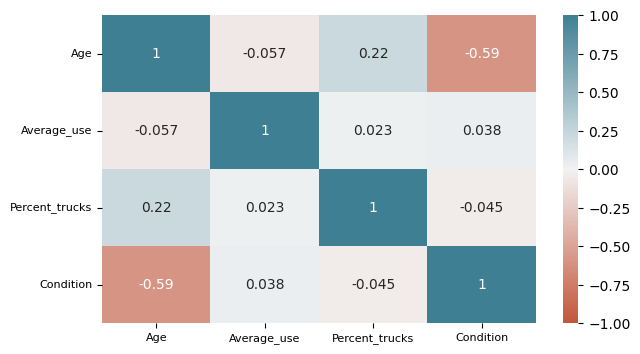

In [23]:
fig,ax = plt.subplots(1,1, figsize=(7,4))
sns.heatmap(df_new.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 10})
_y = plt.yticks(rotation=0, fontsize=8)
_x = plt.xticks(rotation=0, fontsize=8)

**Correlation:**

1.The variable 'Age' has a negative correlation with the Condition variable (-0.59)

2.This implies that the bridge condition will deteriorate with Age (inversely proportional) 

3.Other variables do not seem to have a significant relation 

4.Predictors 'Average use' number of vehicles and 'Percent_trucks' - traffic made of number of trucks do not have any direct impact on the condition of the bridges

#### 2.2 Scatter Matrix
Pandas provides a function to plot 'scatter matrix', which shows a scatter plot of all the numeric variables (with distributions on the diagonal axis).

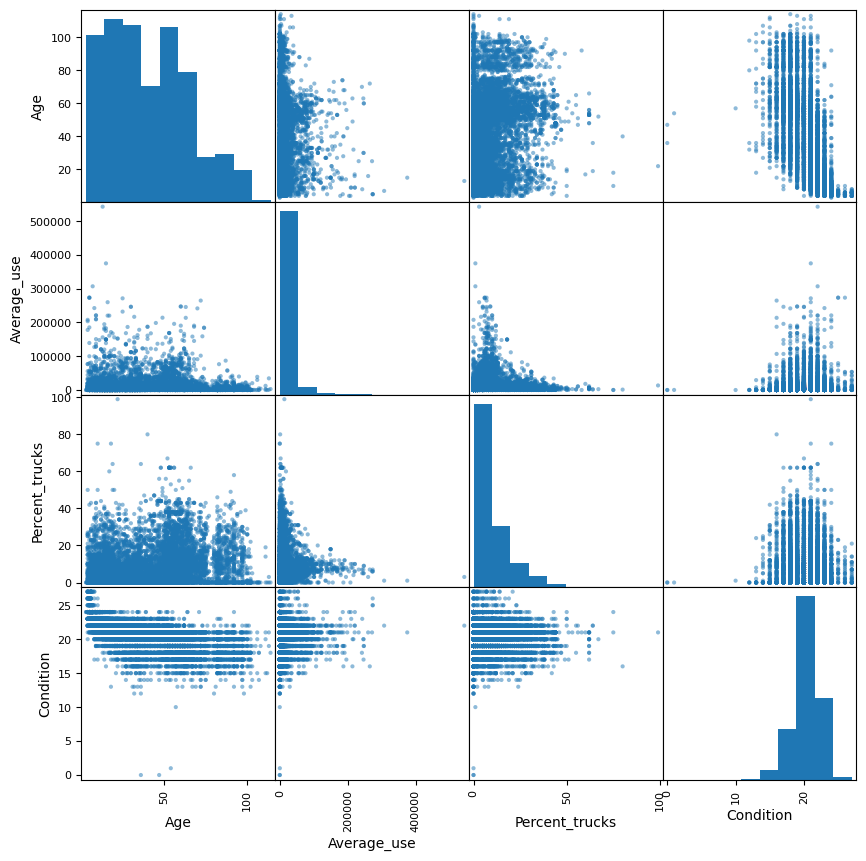

In [24]:
_Pbridges = pd.plotting.scatter_matrix(df_new.sample(frac=.30), figsize=(10,10))

**Correlation:**

1. Not a very clear correlation visible between any variable but we can some -ve correlation between Age and condition

2. Zero correlation relation between other numeric variable predictors  

#### 2.2 Scatter plot

Text(0.5, 1.0, 'Correlation between Age and Condition variable - Scatter plot')

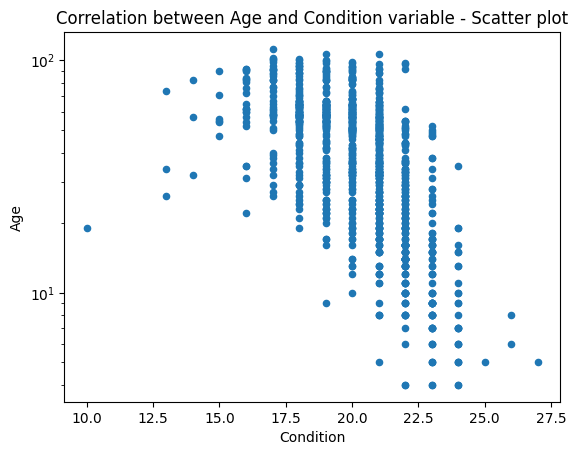

In [25]:
ax = df_new.sample(frac=0.03).plot(kind='scatter',  x='Condition', y='Age', logy=True)
plt.title('Correlation between Age and Condition variable - Scatter plot')

**Correlation:**

1.Above scatter plot shows negative correlation between Age and Condtion

2.For higher values of Age variable on y axis, condition variable shows lower values on the x axis 

#### 2.3 Comparing Groups using Kernel Density 
Similar to a histogram KDE density plot shows the extent and variation in ages of bridges with the different material. 
To what extent and how do the ages of bridges with the different material differ
To what extent and how do the ages of bridges with the different deck material differ? 

/tmp/ipykernel_180/1255644225.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d_Con[var], label='Concrete', ax=ax1, alpha=0.3, shade=True)
/tmp/ipykernel_180/1255644225.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d_Oth[var], label='Other', ax=ax1, alpha=0.3, shade=True)
/tmp/ipykernel_180/1255644225.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d_St[var], label='Steel', ax=ax1, alpha=0.3, shade=True)
/tmp/ipykernel_180/1255644225.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your co

Text(0.5, 0, 'Age')

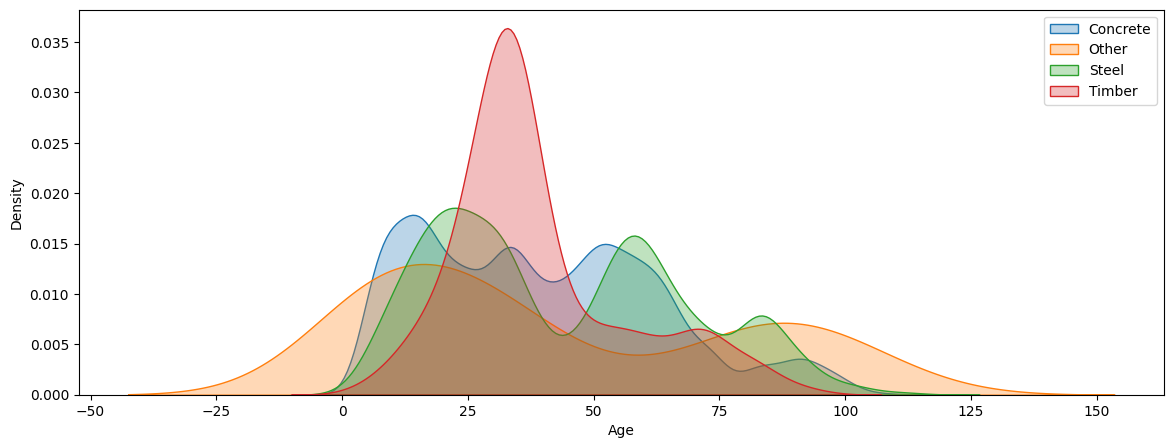

In [26]:

gbyMat = df_new.groupby(by = 'Material') # GroupBy object (created using the groupby method)
                                                                                  
d_Con = gbyMat.get_group('Concrete')
d_Oth = gbyMat.get_group('Other')
d_St = gbyMat.get_group('Steel')
d_Ti = gbyMat.get_group('Timber')


fig, ax1 = plt.subplots(1, 1, figsize=(14,5))
var = 'Age'

sns.kdeplot(data=d_Con[var], label='Concrete', ax=ax1, alpha=0.3, shade=True)
sns.kdeplot(data=d_Oth[var], label='Other', ax=ax1, alpha=0.3, shade=True)
sns.kdeplot(data=d_St[var], label='Steel', ax=ax1, alpha=0.3, shade=True)
sns.kdeplot(data=d_Ti[var], label='Timber', ax=ax1, alpha=0.3, shade=True)

names = ['Concrete', 'Other', 'Steel', 'Timber']
ax1.legend(names)


ax1.set_xlabel('Age')

*The age variation is highest for material 'Other' around 200 followed by 'Concrete' and 'Steel' - 130 and lastly 'Timber' - 100**

/tmp/ipykernel_180/3602786043.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d_Beam[var], label='Beam', ax=ax1, alpha=0.3, shade=True)
/tmp/ipykernel_180/3602786043.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d_Slab[var], label='Slab', ax=ax1, alpha=0.3, shade=True)
/tmp/ipykernel_180/3602786043.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d_Other[var], label='Other', ax=ax1, alpha=0.3, shade=True)


Text(0.5, 0, 'Var in age')

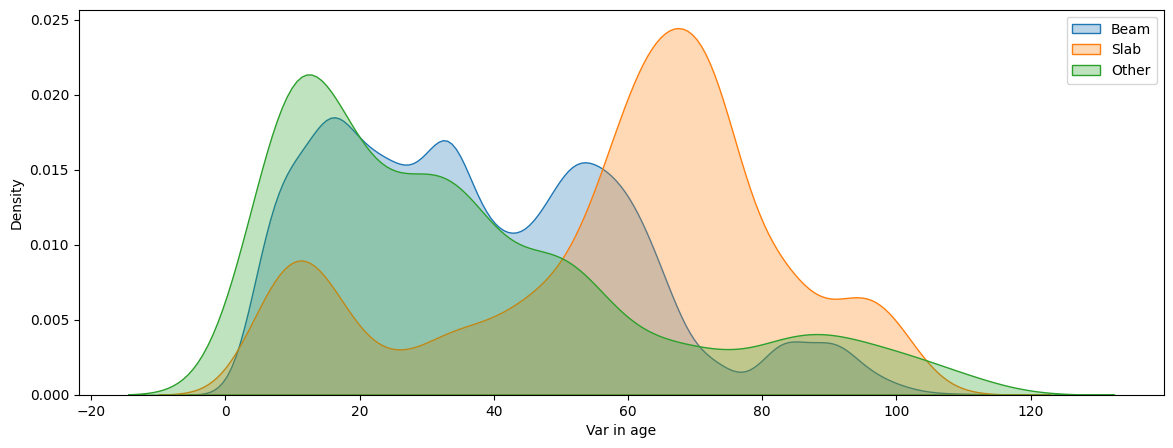

In [27]:
gbyDes = df_new.groupby(by = 'Design')

d_Beam = gbyDes.get_group('Beam')
d_Slab = gbyDes.get_group('Slab')
d_Other = gbyDes.get_group('Other')


fig, ax1 = plt.subplots(1, 1, figsize=(14,5))
var = 'Age'

sns.kdeplot(data=d_Beam[var], label='Beam', ax=ax1, alpha=0.3, shade=True)
sns.kdeplot(data=d_Slab[var], label='Slab', ax=ax1, alpha=0.3, shade=True)
sns.kdeplot(data=d_Other[var], label='Other', ax=ax1, alpha=0.3, shade=True)


names = ['Beam', 'Slab', 'Other']
ax1.legend(names)


ax1.set_xlabel('Var in age')

*The age variation is highest for design 'Other' - 150 followed by 'Slab' - 130 and 'Beam' - 110**

#### 2.4 Cross Tabulation and Normalisation - For Categorical variables

In [28]:
mat_given_des = pd.crosstab(df_new.Design, [df_new.Material], normalize='index')
des_given_mat = pd.crosstab(df_new.Material, [df_new.Design], normalize='index')

In [29]:
mat_given_des.round(4)*100

Material,Concrete,Other,Steel,Timber
Design,,,,
Beam,76.64,0.00,21.72,1.64
Other,66.87,3.79,29.27,0.06
Slab,100.00,0.00,0.00,0.00


In [30]:
des_given_mat.round(4)*100

Design,Beam,Other,Slab
Material,,,
Concrete,80.03,3.97,16.0
Other,0.00,100.00,0.0
Steel,92.89,7.11,0.0
Timber,99.78,0.22,0.0


#### 2.5 Conditional Probability Distributions - Categorical variables

Text(0.5, 1.0, 'Probability of Design, given Material')

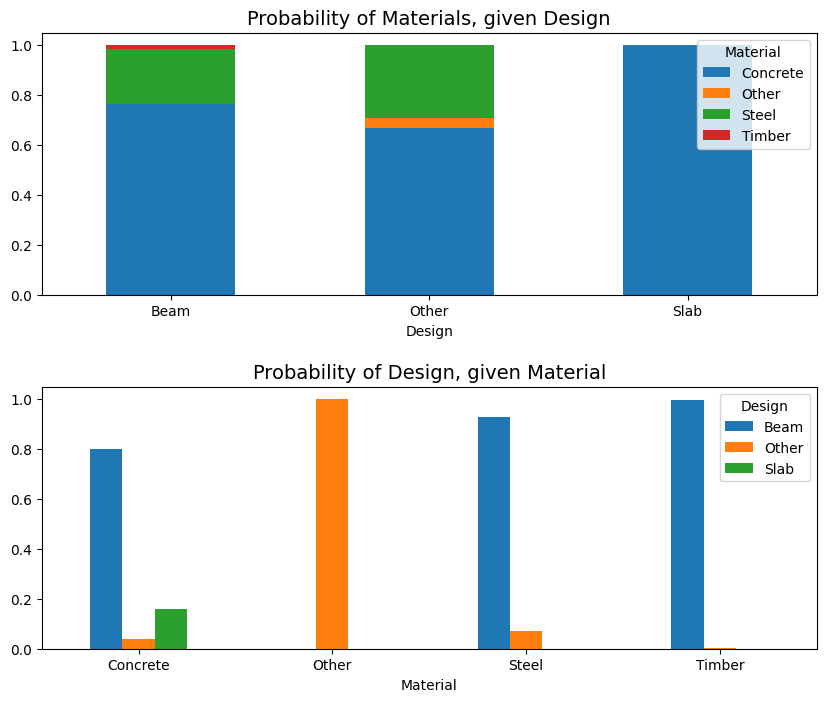

In [31]:
# Generate suitable axes
fig,(a1, a2,) = plt.subplots(2,1,figsize=(10,8), sharey=False, sharex=False)
fig.subplots_adjust(hspace=0.35)

mat_given_des.plot(kind='bar', subplots=False, ax=a1, rot=0, stacked=True)
a1.set_title('Probability of Materials, given Design', fontsize=14)

des_given_mat.plot(kind='bar', subplots=False, ax=a2, rot=0, stacked = False)
a2.set_title('Probability of Design, given Material', fontsize=14)

**'Probability of Material, given Design'**

1. 100% of slab design bridges are made of concrete, 65% of other design and 75% beam design bridges also are made of concrete material
2. Second best material is steel which is used for other and beam design bridges in 30% to  40% capacity
3. Other material is only used in 5% quantity in other design bridges
4. Timber is the least used material around 1% in beam design bridges

**'Probability of Design, given Material'**

1. Probability of Beam design bridges are the highest for concrete, steel and Timber materials.
2. Chances of 'Other' design probability is high for bridges made of 'Other' material along with 
concrete, steel materials but that is quite low.
3. Slab design bridges probability  is the lowest only for given concrete material bridge 

#### 2.6 Heatmap of conditional probabilities

Text(0.5, 1.0, 'Material given Design')

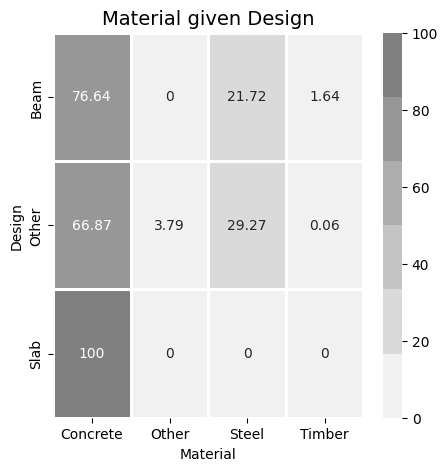

In [32]:
material_given_design = pd.crosstab(df_new.Design, [df_new.Material], normalize='index')

fig,ax = plt.subplots(1,1, figsize=(5,5))
sns.heatmap(material_given_design.round(4)*100, cmap=sns.light_palette('grey'), linewidths = 2,
           annot=True, ax=ax, annot_kws={"size": 10}, fmt='g')
ax.set_title('Material given Design', fontsize=14)

*Correlations between Concrete and slab - 100, concrete and other design - 66.87 and concrete and beam - 76.64*

Text(0.5, 1.0, 'Design given Material')

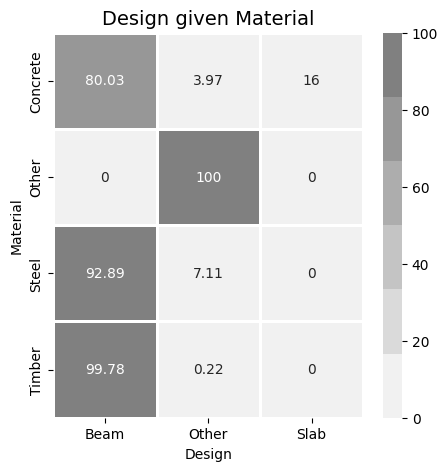

In [33]:
design_given_material = pd.crosstab(df_new.Material, [df_new.Design], normalize='index')

fig,ax = plt.subplots(1,1, figsize=(5,5))
sns.heatmap(design_given_material.round(4)*100, cmap=sns.light_palette('grey'), linewidths = 2,
           annot=True, ax=ax, annot_kws={"size": 10}, fmt='g')
ax.set_title('Design given Material', fontsize=14)

*Correlation between Beam design and Timber, Beam design and steel, Beam design and concrete*
*Other design and other material is very high*

## Regression Modelling

Construction of a linear regression to look at the effect of the five predictor variables on the target variable.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#### 3.1 Regression with continuous predictors

### Preparation

We look at the distribution of the three continuous variables involved.

1. The theory of regression - in particular that the best regression line minimises the square of the errors - assumes that the dependent variable has a normal distribution.We see that the 'condition' variable has a very slight negative skew, but not too much.

2. There is no assumption that the predictor (independent) variables are normally distributed. Note however that a better fit may be achieved if variables are transformed. A high degree of skew may be an indication that some transformation would work better. The proposed predictors do not have an alarming skew.

3. The predictor variables should not be co-linear. Check this on a scatter and / or look at the correlation coefficient.The predictors do not seem very correlated.

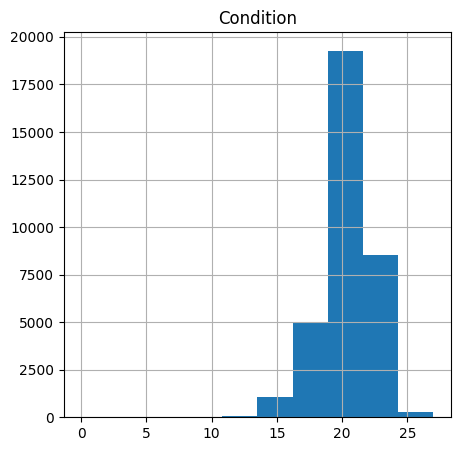

In [35]:
x_hist = df_new.hist(column = "Condition", figsize=(5,5)) 

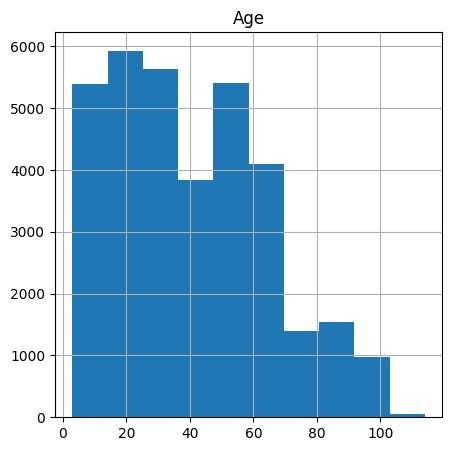

In [36]:
x_hist = df_new.hist(column = "Age", figsize=(5,5)) 

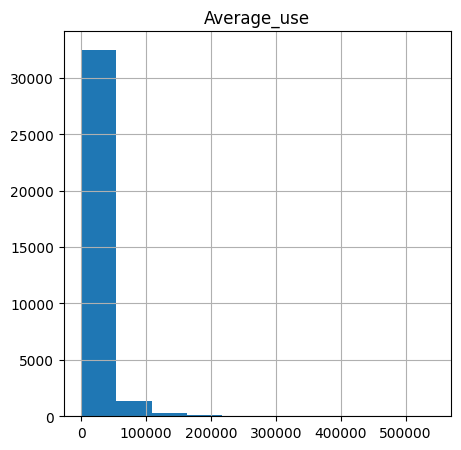

In [37]:
x_hist = df_new.hist(column = "Average_use", figsize=(5,5)) 

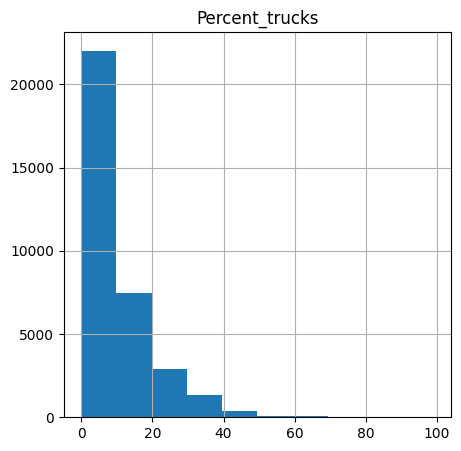

In [38]:
x_hist = df_new.hist(column = "Percent_trucks", figsize=(5,5)) 

<AxesSubplot: xlabel='Average_use', ylabel='Percent_trucks'>

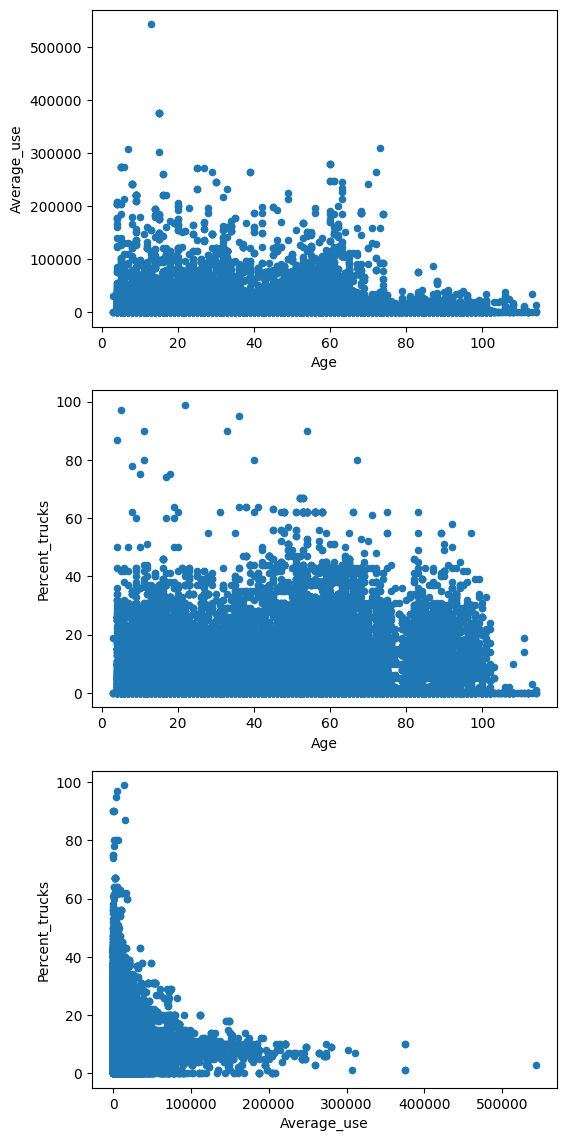

In [39]:
fig, (a1,a2,a3) = plt.subplots(3, 1, figsize=(6,14))

df_new.plot(kind='scatter',  x='Age', y='Average_use', ax=a1)
df_new.plot(kind='scatter',  x='Age', y='Percent_trucks', ax=a2)
df_new.plot(kind='scatter',  x='Average_use', y='Percent_trucks', ax=a3)

#### 3.2 Using categorical predictors

To use categorical/ordinal predictors,transforming them using reference encoding. Pandas provides a very simple way to do this, using `get_dummies`. For reference encoding we use the first value of the categorical variable as a reference, so this is dropped from the dummy variables. 


In [40]:
d_material = pd.get_dummies(df_new.Material, drop_first=True)
d_material 

,Other,Steel,Timber
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
34265,0,0,0
34266,0,0,0
34267,0,0,0
34268,0,0,0


In [41]:
d_design = pd.get_dummies(df_new.Design, drop_first=True)
d_design 

,Other,Slab
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
34265,0,0
34266,0,0
34267,0,0
34268,0,0


#### 3.3 Recording R2 and comments

In this section we look at the fit method that is used to fit the linear regression to calculate R2

To fit a linear regression, we need to get the predictor data in the right format. The regression fit routine expects to have an array containing a list of predictor values. This can be done with column_stack. 

In [42]:
X = np.column_stack((df_new.Age, df_new.Average_use, df_new.Percent_trucks, d_material.Other,
d_material.Steel,d_material.Timber,d_design.Other,d_design.Slab))
y = df_new.Condition # this is the target variable
reg = LinearRegression().fit(X, y)

print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg.intercept_)
print('The regression coefficients are:',reg.coef_)

The R2 coefficient of determination is 0.456
The intercept is 22.6
The regression coefficients are: [-4.85146532e-02 -7.96964991e-07  4.72522828e-03  3.53902987e-01
 -1.37611233e+00 -3.19666864e+00  1.09632524e-02 -8.21450286e-02]


**R2 being 0.456 denotes the proportion of variation (or the percentage 46%) of dependent/target variable i.e. condition of the bridge that is predictable from independent variables**

#### 3.4 Distribution of residuals (errors)

We can use the predict method to return the predicted values of the target variable. Then we can calculate the errors and show their distribution.

We will first calculate the predicted values of the target condition and then subtract it by the actual values to plot the distribution of the error in prediction

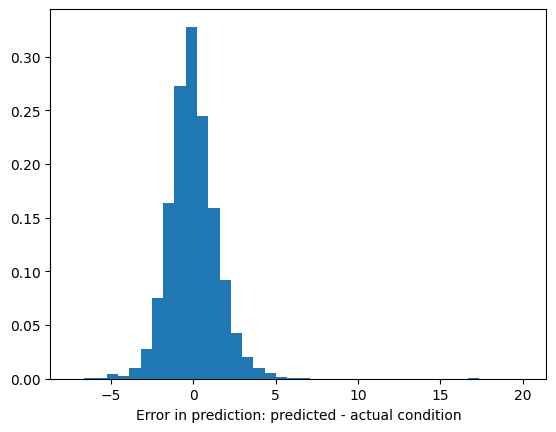

In [43]:
# Predicted value of target variables y_hat
# Calulating of residual errors

y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=40, density=True)
_ = a1.set_xlabel('Error in prediction: predicted - actual condition')



*Distribution of the residuals is normal*

*The line for which the error between the predicted values and the actual values in the minimum is called the best fit line or the regression line.The errors are called residuals*

*A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the actual value*

Text(0, 0.5, 'Actual Value')

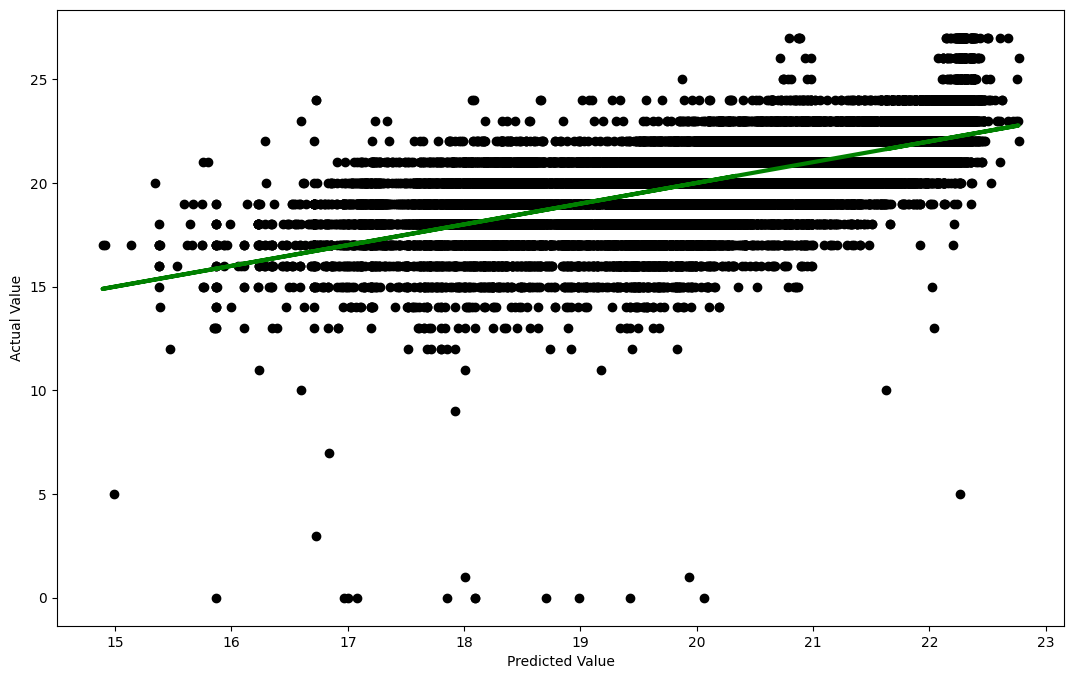

In [44]:
# Plotting the best fit line 
fig, a = plt.subplots(1,1,figsize=(13,8))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='green', linewidth=3)

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

#### Comparison of coefficients

The coefficients of a linear regression have units and the values change if we scale the predictors.Since the units are different, we need to take care when we compare them.We could however make a comparison based on the distributions of the two variables.

In [45]:
X1 = np.column_stack((df_new.Age, df_new.Average_use, df_new.Percent_trucks))
y = df_new.Condition 
reg = LinearRegression().fit(X1, y)
beta_Age,beta_Average_use,beta_Percent_trucks = reg.coef_
print('The R2 coefficient of determination is %4.3f' % reg.score(X1, y))
print('The intercept is %4.1f' % reg.intercept_)
print('The regression coefficients are:', reg.coef_)

The R2 coefficient of determination is 0.360
The intercept is 22.2
The regression coefficients are: [-5.14571595e-02  4.59787920e-08  1.70562720e-02]


In [46]:
age_range = df_new.Age.quantile(0.9) - df_new.Age.quantile(0.1)
Average_use_range = df_new.Average_use.quantile(0.9) - df_new.Average_use.quantile(0.1)
Percent_trucks_range = df_new.Percent_trucks.quantile(0.9) - df_new.Percent_trucks.quantile(0.1)
Condition_range = df_new.Condition.quantile(0.9) - df_new.Condition.quantile(0.1)

print('Age range (10th to 90th centile) is %3.1f' % age_range, 'years')
print('Average use range (10th to 90th centile) is %3.1f' % Average_use_range, 'number of vehicles')
print('Percent trucks range (10th to 90th centile) is %3.1f' % Percent_trucks_range, 'percentage traffic made of trucks')
print('Conition rate range (10th to 90th centile) is %3.1f' % Condition_range)

Age range (10th to 90th centile) is 61.0 years
Average use range (10th to 90th centile) is 29560.0 number of vehicles
Percent trucks range (10th to 90th centile) is 23.0 percentage traffic made of trucks
Conition rate range (10th to 90th centile) is 5.0


In [47]:
print ('The change in Condition Rate (as a percent of its range) given by the age coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Age * age_range) / Condition_range))

print ('The change in Condition Rate (as a percent of its range) given by the Average use coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Average_use * Average_use_range) / Condition_range))

print ('The change in Condition Rate (as a percent of its range) given by the percent trucks coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Percent_trucks * Percent_trucks_range) / Condition_range))

The change in Condition Rate (as a percent of its range) given by the age coefficient (over its range) is -62.8 percent
The change in Condition Rate (as a percent of its range) given by the Average use coefficient (over its range) is  0.0 percent
The change in Condition Rate (as a percent of its range) given by the percent trucks coefficient (over its range) is  7.8 percent


Conclusion

The proposed variables can predict the bridge condition fairly well approximately close to 50% .

To be precise R2 being 0.456, proportion of the variance is 46% for our dependent variable i.e the bridge condition which is predicted by the independent variables in the regression model

Beta or the regression coefficients for each of the predictor variables is as follows
1. Age -4.85146532e-02 
2. Average_use -7.96964991e-07  
3. Percent trucks 4.72522828e-03 
4. Material_ Other 3.53902987e-01
5. Material _Steel -1.37611233e+00 
6. Material_Timber -3.19666864e+00 
7. Design_Other 1.09632524e-02 
8. Design_Slab -8.21450286e-02 

**From the above coefficients we can make following predictions:**
1. The bridge condition will decrease by 4.8% with increase in age every 1 year (Beta value is negative hence when the predictor increases, the target variable decreases and vice versa)
2. The bridge condition will decrease by 0.00007% each day as the average daily traffic or the number of vehicles goes up but since the value -7.96964991e-07 is very small it does not have much impact on condition of the bridges (not an important predictor)
3. Also the beta value of percent trucks (percent of trucks made up of 'trucks) is quite low (- 0.0047) hence this predictor is not very important and would not have much impact on the condition of the bridges
4. For categorical variables material variable, concrete being the reference category(dropped), we can say that the chances of  dominant material of which the bridge is made of, being of other material is 35% higher compared to concrete
5. For categorical variables material variable, concrete being the reference category(dropped), we can say that we can say that the chances of  dominant material of which the bridge is made of, being of of steel material  is 1.3% lower compared to concrete
6. For categorical variables material variable, concrete being the reference category(dropped), we can say that we can say that the chances of  dominant material of which the bridge is made of, being of of Timber material  is 3.3% lower compared to concrete
7. For categorical variables deign variable, beam design being the reference category(dropped), we can say that the chances of bridge design being of Other design is 0.000109% higher compared to concrete which is a very low 
8. For categorical variables deign variable, beam design being the reference category(dropped), we can say that the chances of bridge design being of Slab design is 0.00082% lower compared to concrete which is again quite low


**From the comparison of coefficients we can conclude that the proposed variable Age has the maximum influence on the target variable when compared to other predictors with a value of 64 versus 7.8 for percent trucks predictor variable.** 
